In [59]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [60]:
airbnb = pd.read_csv('listings.csv')
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,2.020000e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,2.020000e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,2.020000e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,2.020000e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,2.020000e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [61]:
amenities = pd.DataFrame(airbnb[["amenities"]])
amenities.head()

,amenities
0,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
1,"{TV,Internet,""Wireless Internet"",Kitchen,""Free..."
2,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A..."
3,"{Internet,""Wireless Internet"",Kitchen,""Indoor ..."
4,"{TV,""Cable TV"",Internet,""Wireless Internet"",Ki..."


In [62]:
amenities['amenities'] = amenities['amenities'].astype(str)
amenities['amenities'] = amenities['amenities'].apply(lambda x: x.replace('{',''))
amenities['amenities'] = amenities['amenities'].apply(lambda x: x.replace('}',''))
amenities['amenities'] = amenities['amenities'].apply(lambda x: x.replace('"',''))
amenities.head()

,amenities
0,"TV,Cable TV,Internet,Wireless Internet,Air Con..."
1,"TV,Internet,Wireless Internet,Kitchen,Free Par..."
2,"TV,Cable TV,Internet,Wireless Internet,Air Con..."
3,"Internet,Wireless Internet,Kitchen,Indoor Fire..."
4,"TV,Cable TV,Internet,Wireless Internet,Kitchen..."


In [63]:
amenities_list = amenities['amenities'].tolist()
print(amenities_list)

['TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer', 'TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,Buzzer/Wireless Intercom,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Safety Card,Fire Extinguisher,Essentials', 'TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Free Parking on Premises,Pets Allowed,Pets live on this property,Dog(s),Cat(s),Hot Tub,Indoor Fireplace,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Essentials,Shampoo', 'Internet,Wireless Internet,Kitchen,Indoor Fireplace,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Safety Card,Fire Extinguisher,Essentials,Shampoo', 'TV,Cable TV,Internet,Wireless Internet,Kitchen,Heating,Family/Kid Friendly,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Fire Extinguisher,Essentials,Shampoo', 'Wireless Internet,Free Parking on Prem

In [64]:
amenities_string = ','.join(amenities_list)
print(amenities_string)

TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Heating,Family/Kid Friendly,Washer,Dryer,TV,Internet,Wireless Internet,Kitchen,Free Parking on Premises,Buzzer/Wireless Intercom,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Safety Card,Fire Extinguisher,Essentials,TV,Cable TV,Internet,Wireless Internet,Air Conditioning,Kitchen,Free Parking on Premises,Pets Allowed,Pets live on this property,Dog(s),Cat(s),Hot Tub,Indoor Fireplace,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Essentials,Shampoo,Internet,Wireless Internet,Kitchen,Indoor Fireplace,Heating,Family/Kid Friendly,Washer,Dryer,Smoke Detector,Carbon Monoxide Detector,Safety Card,Fire Extinguisher,Essentials,Shampoo,TV,Cable TV,Internet,Wireless Internet,Kitchen,Heating,Family/Kid Friendly,Smoke Detector,Carbon Monoxide Detector,First Aid Kit,Fire Extinguisher,Essentials,Shampoo,Wireless Internet,Free Parking on Premises,Heating,Smok

In [65]:
x = amenities_string.split(',')
x

['TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'TV',
 'Internet',
 'Wireless Internet',
 'Kitchen',
 'Free Parking on Premises',
 'Buzzer/Wireless Intercom',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'First Aid Kit',
 'Safety Card',
 'Fire Extinguisher',
 'Essentials',
 'TV',
 'Cable TV',
 'Internet',
 'Wireless Internet',
 'Air Conditioning',
 'Kitchen',
 'Free Parking on Premises',
 'Pets Allowed',
 'Pets live on this property',
 'Dog(s)',
 'Cat(s)',
 'Hot Tub',
 'Indoor Fireplace',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'Essentials',
 'Shampoo',
 'Internet',
 'Wireless Internet',
 'Kitchen',
 'Indoor Fireplace',
 'Heating',
 'Family/Kid Friendly',
 'Washer',
 'Dryer',
 'Smoke Detector',
 'Carbon Monoxide Detector',
 'Safety Card',
 'Fire Extinguisher',
 'Es

In [66]:
amenities_set=set(x)
amenities_set.remove('')
amenities_set

{'24-Hour Check-in',
 'Air Conditioning',
 'Breakfast',
 'Buzzer/Wireless Intercom',
 'Cable TV',
 'Carbon Monoxide Detector',
 'Cat(s)',
 'Dog(s)',
 'Doorman',
 'Dryer',
 'Elevator in Building',
 'Essentials',
 'Family/Kid Friendly',
 'Fire Extinguisher',
 'First Aid Kit',
 'Free Parking on Premises',
 'Gym',
 'Hair Dryer',
 'Hangers',
 'Heating',
 'Hot Tub',
 'Indoor Fireplace',
 'Internet',
 'Iron',
 'Kitchen',
 'Laptop Friendly Workspace',
 'Lock on Bedroom Door',
 'Other pet(s)',
 'Pets Allowed',
 'Pets live on this property',
 'Pool',
 'Safety Card',
 'Shampoo',
 'Smoke Detector',
 'Smoking Allowed',
 'Suitable for Events',
 'TV',
 'Washer',
 'Washer / Dryer',
 'Wheelchair Accessible',
 'Wireless Internet'}

In [67]:
y=len(amenities_set)
y

41

In [72]:
amenities_score_list=[]
for var in amenities_list:
    amenities_each = var.split(',')
    #print(amenities_each)
    amenities_score=len(amenities_each)
    #print(amenities_score)
    amenities_score_list.append(amenities_score)

print(amenities_score_list)
print(len(amenities_score_list))    

[10, 16, 21, 14, 13, 6, 7, 7, 15, 16, 21, 12, 17, 16, 19, 13, 14, 8, 20, 19, 11, 12, 13, 20, 12, 16, 13, 6, 18, 14, 14, 13, 16, 16, 19, 16, 14, 11, 12, 20, 17, 11, 17, 15, 12, 15, 13, 14, 18, 6, 18, 5, 13, 12, 17, 16, 12, 18, 12, 12, 17, 8, 10, 7, 10, 20, 17, 20, 10, 17, 1, 20, 18, 12, 8, 13, 11, 12, 11, 5, 16, 23, 24, 12, 11, 10, 15, 11, 18, 6, 10, 14, 12, 15, 18, 15, 10, 14, 9, 15, 12, 19, 16, 15, 19, 12, 15, 13, 14, 17, 16, 9, 14, 11, 12, 22, 17, 1, 19, 14, 23, 11, 13, 13, 9, 20, 12, 9, 10, 8, 18, 15, 14, 8, 17, 11, 11, 7, 21, 12, 8, 21, 12, 15, 19, 10, 11, 17, 15, 16, 12, 13, 16, 12, 17, 10, 15, 8, 13, 16, 17, 9, 13, 18, 10, 14, 10, 18, 14, 16, 14, 16, 21, 12, 23, 17, 19, 12, 7, 19, 11, 16, 15, 11, 18, 14, 12, 14, 10, 12, 10, 9, 13, 23, 11, 15, 8, 18, 17, 13, 15, 11, 13, 15, 7, 17, 15, 16, 21, 17, 13, 18, 8, 20, 13, 14, 18, 7, 15, 16, 15, 19, 12, 13, 14, 20, 14, 16, 16, 1, 17, 13, 15, 7, 13, 24, 12, 14, 9, 23, 20, 15, 6, 19, 14, 16, 5, 16, 17, 18, 10, 21, 15, 16, 21, 24, 12, 17, 18

In [74]:
airbnb['Amenities score (out of 41)'] = amenities_score_list
airbnb.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,Amenities score (out of 41)
0,241032,https://www.airbnb.com/rooms/241032,2.020000e+13,1/4/2016,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07,10
1,953595,https://www.airbnb.com/rooms/953595,2.020000e+13,1/4/2016,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,f,NaN,WASHINGTON,f,strict,t,t,6,1.48,16
2,3308979,https://www.airbnb.com/rooms/3308979,2.020000e+13,1/4/2016,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,f,NaN,WASHINGTON,f,strict,f,f,2,1.15,21
3,7421966,https://www.airbnb.com/rooms/7421966,2.020000e+13,1/4/2016,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN,14
4,278830,https://www.airbnb.com/rooms/278830,2.020000e+13,1/4/2016,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,f,NaN,WASHINGTON,f,strict,f,f,1,0.89,13


In [103]:
amenities_score_dataframe = pd.DataFrame(airbnb['Amenities score (out of 41)'])
review_scores_rating = pd.DataFrame(airbnb['review_scores_rating'])

#airbnb["price"] = airbnb["price"].apply(lambda x: x.replace('$',''))
#airbnb["price"] = airbnb["price"].apply(lambda x: x.replace(',',''))
#airbnb["price"] = airbnb["price"].apply(lambda x: x.replace('.',''))
#airbnb["price"] = airbnb["price"].astype(str).astype(float)
#airbnb["price"] = airbnb["price"]/100
price = pd.DataFrame(airbnb['price'])
price.head()

,price
0,85.0
1,150.0
2,975.0
3,100.0
4,450.0


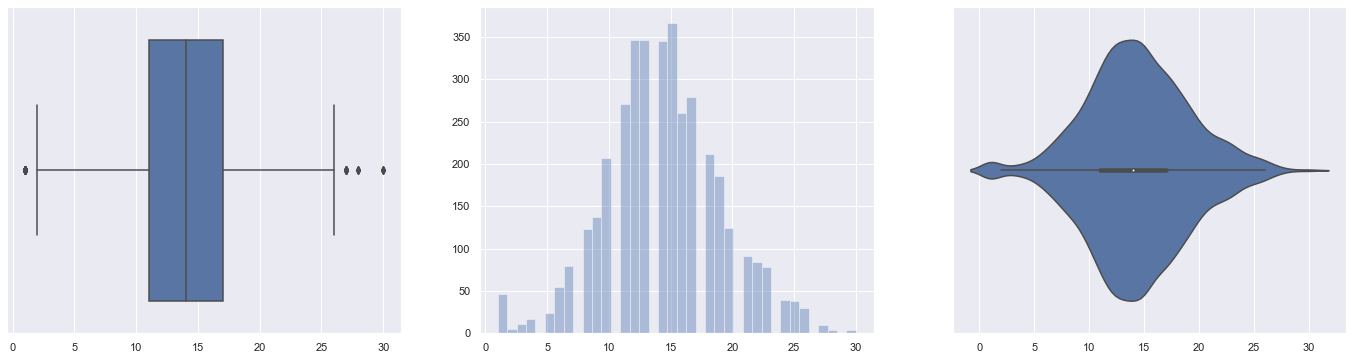

In [96]:
f, axes = plt.subplots(1, 3, figsize=(24, 6))
sb.boxplot(amenities_score_dataframe, orient = "h", ax = axes[0])
sb.distplot(amenities_score_dataframe, kde = False, ax = axes[1])
sb.violinplot(amenities_score_dataframe, ax = axes[2])

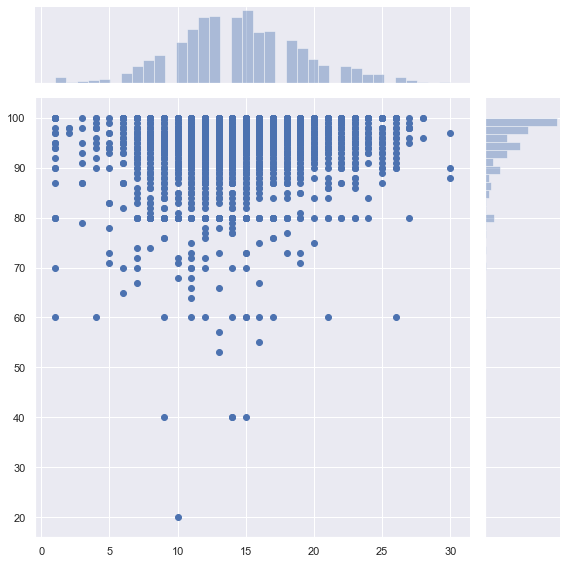

In [97]:
sb.jointplot(amenities_score_dataframe, review_scores_rating, height = 8)

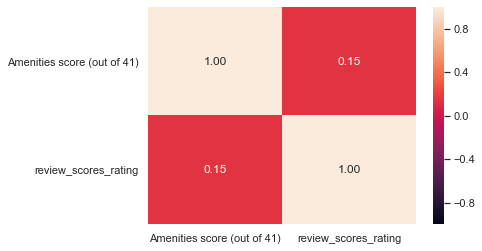

In [83]:
jointDF = pd.concat([amenities_score_dataframe, review_scores_rating.reindex(index=review_scores_rating.index)], sort = False, axis = 1)
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")
#there doesnt seem to be much correlation between review score and amenities score

15    367
13    346
12    346
14    345
17    279
11    271
16    260
18    212
10    207
19    186
9     137
20    124
8     123
21     91
22     84
7      79
23     78
6      55
1      46
24     39
25     38
26     30
5      24
4      17
3      11
27     10
2       5
28      4
30      4
Name: Amenities score (out of 41), dtype: int64


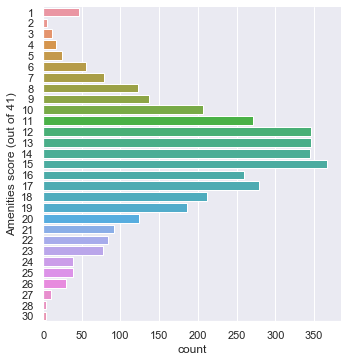

In [90]:
airbnb['Amenities score (out of 41)'] = airbnb['Amenities score (out of 41)'].astype('category')
print(airbnb['Amenities score (out of 41)'].value_counts())
sb.catplot(y = "Amenities score (out of 41)", data = airbnb, kind = "count")

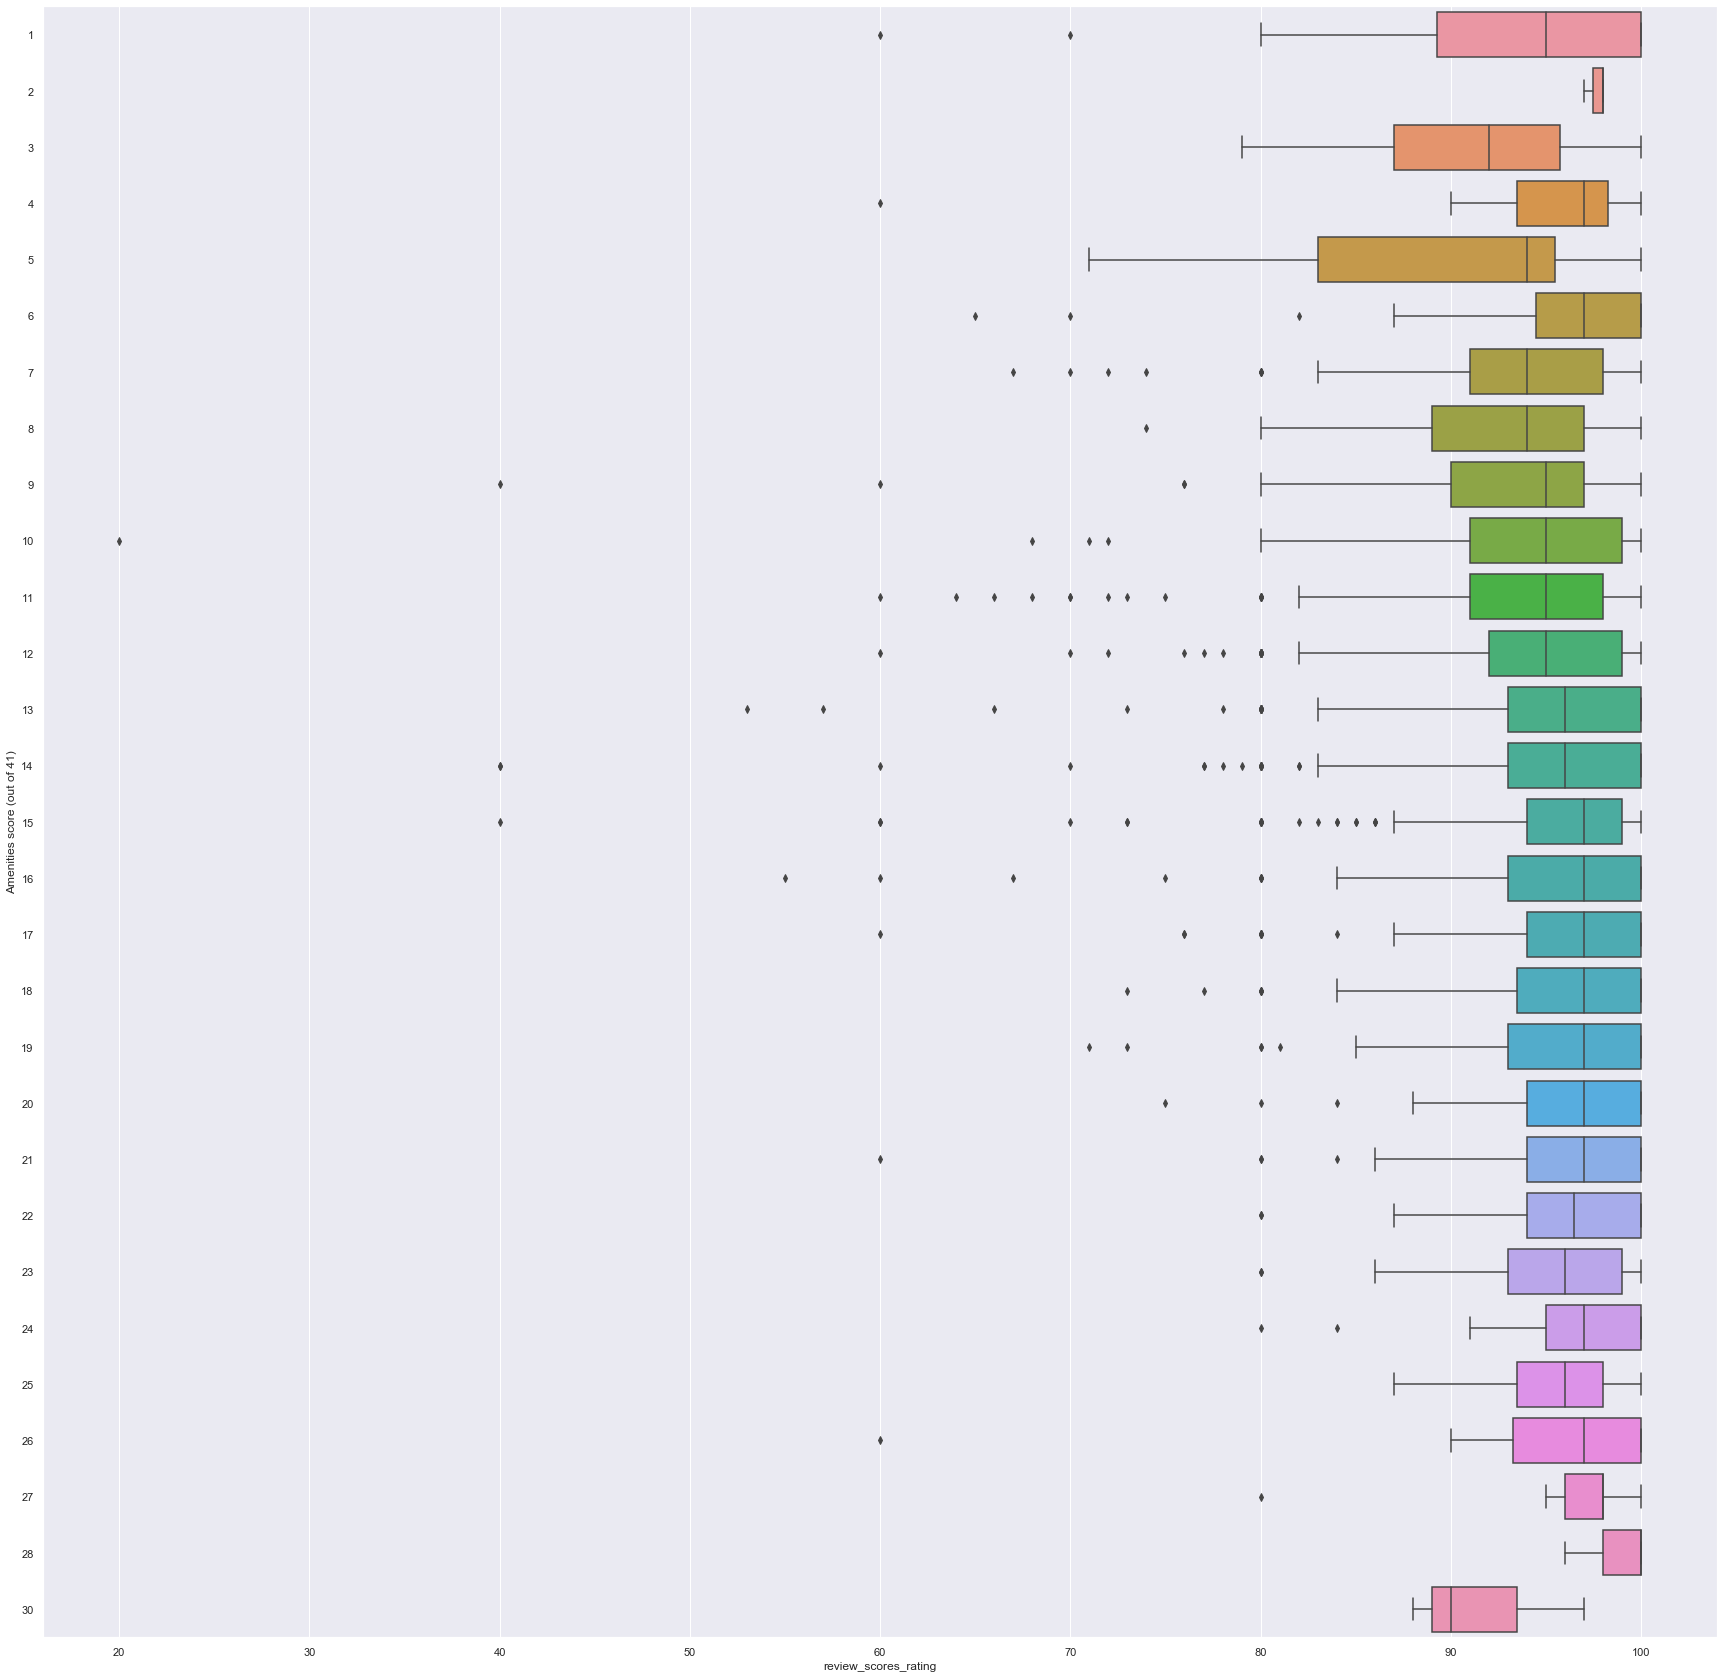

In [94]:
f, axes = plt.subplots(1, 1, figsize=(30,30))
sb.boxplot(y = 'Amenities score (out of 41)', x =  'review_scores_rating', data = airbnb, )

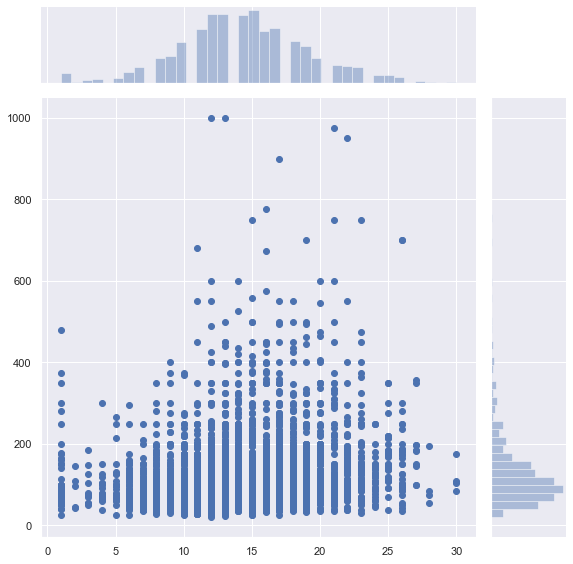

In [98]:
sb.jointplot(amenities_score_dataframe, price, height = 8)
#there doesnt seem to be much correlation between price and amenities score

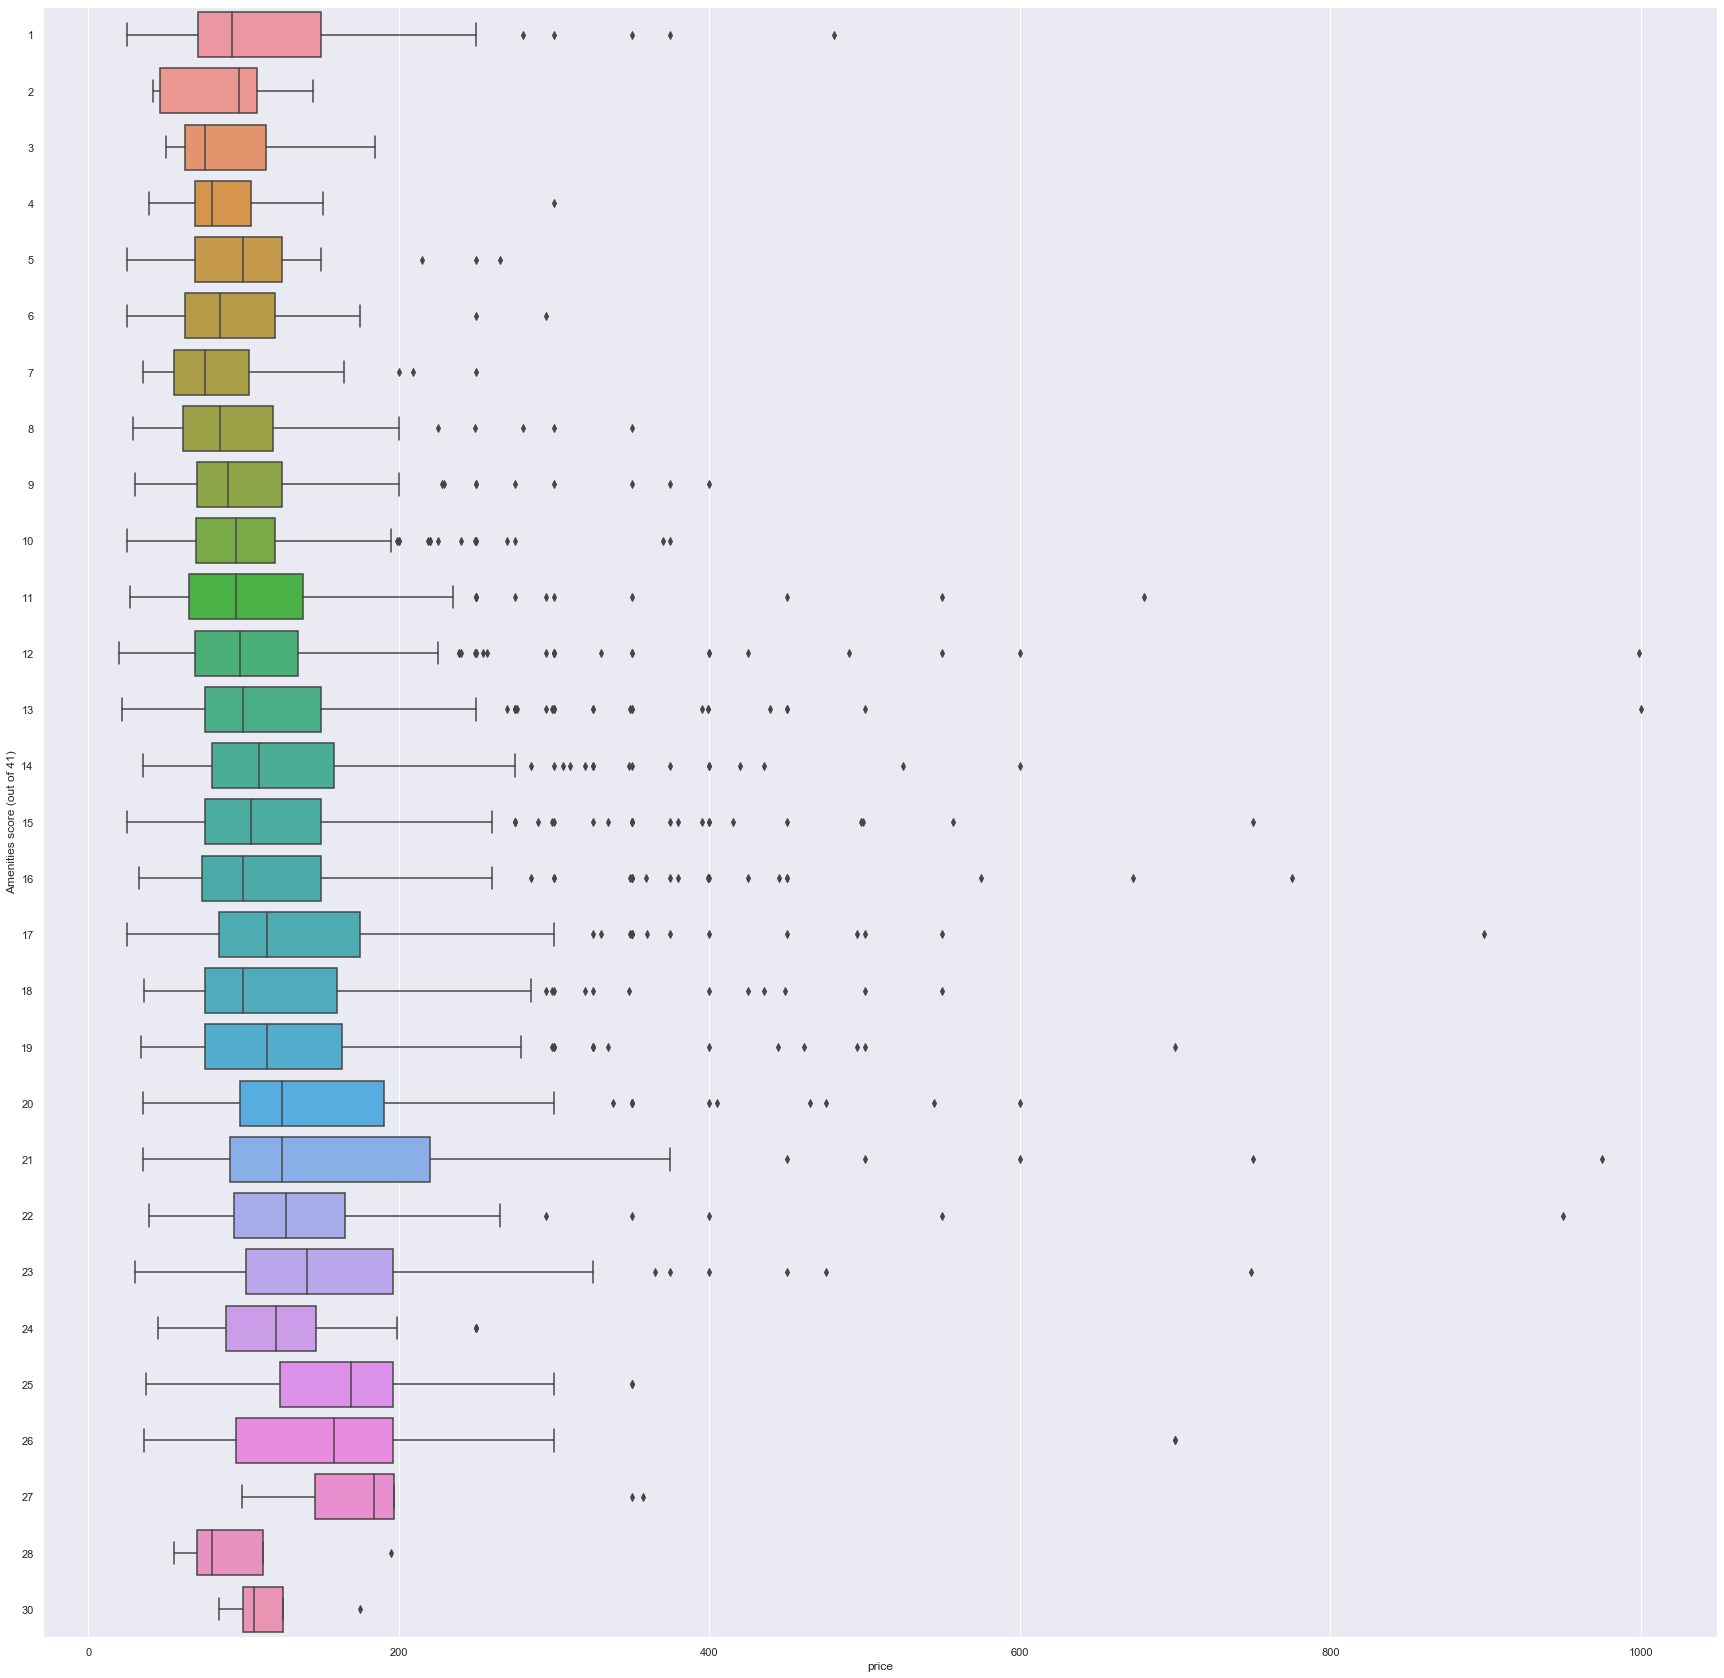

In [105]:
f, axes = plt.subplots(1, 1, figsize=(30,30))
sb.boxplot(y = 'Amenities score (out of 41)', x =  'price', data = airbnb, )